<a href="https://colab.research.google.com/github/AilingLiu/Inferential_Statistics/blob/master/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

# Multiple Regression

## Calculation

We add one more predictor `smile` to our above sample to make the multiple regression. Then, we can use [ols](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) function again to get the statistics summary.

In [0]:
smile = np.array([0.6, 0.7, 1.0, 0.1, 0.3, 0.1, 0.4, 0.8, 0.9, 0.2]) #predictor
money  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #predictor
liking = np.array([2.2, 2.8, 4.5, 3.1, 8.7, 5.0, 4.5, 8.8, 9.0, 9.2]) #response
df = pd.DataFrame({'smile':smile, 'money': money, 'liking':liking})
#using statsmodel ols function
X=sm.add_constant(df[['smile', 'money']])
model=sm.OLS(df['liking'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 liking   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     8.984
Date:                Thu, 13 Feb 2020   Prob (F-statistic):             0.0117
Time:                        16:18:42   Log-Likelihood:                -17.735
No. Observations:                  10   AIC:                             41.47
Df Residuals:                       7   BIC:                             42.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6162      1.545      0.399      0.7

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


R squared for our model is 0.72 - this means that our model including money and smiling is about 72% better than just using the mean to predict how much someone will like us.

F-statistic is 8.984, where p = 0.0117. Based on this, if all of our assumptions are met, smiling and/or money significantly predict liking. Next, we can check the individual parameters in the model. When controling for smiling, liking is related to money. For every unit increase in money, liking increases by 0.8008. The lower limit at 2.5% is 0.3353, and upper limit at 97.5% is 1.249. If we want to change the confidence level 90%, we can calculate the interval directly.

In [0]:
lb = 0.8008 - st.t.ppf(0.95, 7) * 0.189 #0.95 the upper tail, two sided, degree of freedom: n-k where k is the number of parameters in the model including intercept.
ub = 0.8008 + st.t.ppf(0.95, 7) * 0.189
print(f'lower bound {lb}\n upper bound {ub} at 90% of confidence level.')

lower bound 0.4427246436434133
 upper bound 1.1588753563565866 at 90% of confidence level.


## checking assumptions

1.   **Linearity**. The assumption of linearity says that the predictors should be linearly related to the response variable. As we cannot really do this when we have more than one predictor, we are going to look at the residuals against the response variable. We would hope to see the residuals move in a straight line.
2.   **Homoscedasticity**. To check this we should make sure the variation in residuals is roughly even at all levels of the predictor.
3.   **Independent errors**
4.   **Sufficient observations**
5.   **Absence of outliers**. Can use the standardized residuals to check. Standardized residuals greater than 3 or less than -3 are likely outliers.
6.   **Residuals normality**

[]

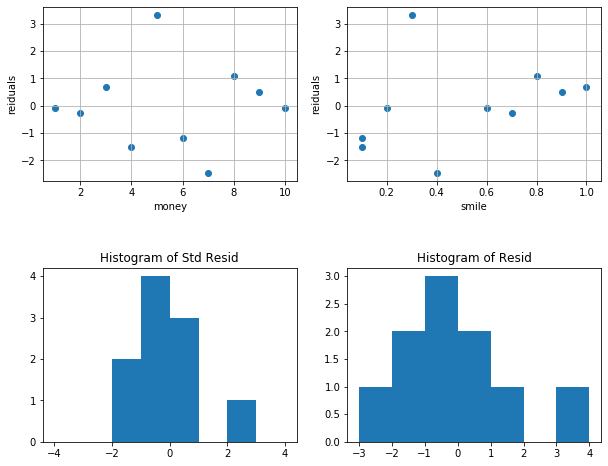

In [0]:
import matplotlib.pyplot as plt

residulas = model.resid
stdresid = residuals/np.std(residuals)
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes[0, 0].scatter(df['money'], residuals)
axes[0, 0].set(xlabel='money', ylabel='reiduals')
axes[0, 0].grid()
axes[0, 1].scatter(df['smile'], residuals)
axes[0, 1].set(xlabel='smile', ylabel='reiduals')
axes[0, 1].grid()
axes[1, 0].hist(stdresid, bins=[-4, -3, -2, -1, 0, 1, 2, 3, 4])
axes[1, 0].set(title='Histogram of Std Resid')
axes[1, 1].hist(residuals, bins=[-3, -2, -1, 0, 1, 2, 3, 4], align='mid')
axes[1, 1].set(title='Histogram of Resid')
fig.subplots_adjust(wspace=0.2, hspace=0.5)
plt.plot()

We see some values fan out in the middle. That means the assumption of homoscedasticity is violated. The linearity is somewhat problematic because of these outliers. From the standardize residuals histogram, it looks like it has one residual over 2, but nothing over or under 3. From the Residuals histogram, we can tell the residuals follow a fairly normal pattern, however the sneaky outliers from before show up at either tail!

## Categorical predictors

Let's include a variable called talk. We either said something neutral ("Nice weather today"), rude ("You smell"), or polite ("You are great"). We coded these responses as 1, 2, and 3, respectively. As OLS function does not help us to dummify the categorical variable directly, we are using its R style [formula.api](https://www.statsmodels.org/dev/example_formulas.html) to do it, with ols function. You can also use pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function to generate such dummies, dropping one of its level from each categorical variable, and put it back to OLS function.

In [0]:
import statsmodels.formula.api as smf

talk = np.array([1, 2, 3, 2, 3, 1, 2, 1, 3, 1])
df['talk']=talk
df['talk']=df['talk'].astype('category')
model2 = smf.ols(formula='liking~smile+money+C(talk)', data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                 liking   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     8.286
Date:                Thu, 13 Feb 2020   Prob (F-statistic):             0.0197
Time:                        17:21:58   Log-Likelihood:                -13.933
No. Observations:                  10   AIC:                             37.87
Df Residuals:                       5   BIC:                             39.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9694      1.482      1.329   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


From the coefficient of talk variable, a rude statement(value 2) was negatively related to how much someone liked us, while a polite statement(value 3) was positively related to how much someone liked us.

## Categorical Response (Logistic Regression)

Let's say instead of a continuous measure of liking, we have a binary measure - either someone likes us (1), or they don't (0).

We can see whether we can predict whether someone likes us or not using logistic regression.

In [0]:
df['liking'] = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1])
X = sm.add_constant(df[['smile', 'money']])
model3 = sm.Logit(df['liking'], X).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.347148
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 liking   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                  0.4992
Time:                        17:47:11   Log-Likelihood:                -3.4715
converged:                       True   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                   0.03143
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5794      3.276     -1.398      0.162     -11.001       1.842
smile         -1.4755      3.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We can tell from the coefficient of money that when you give a person one unit of money, the log odds of them liking you increases by 0.9312. If we take the expopential of log odd, we will get the odd as 2.5, and probability that people like you will be 0.72, which means the increase of 1 unit of money will increase 75% of chance they like you more.

In [0]:
odds = np.exp(0.9312)
py = odds/(1+odds)
py

0.7173186760473905